In [4]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [146]:
df = pd.read_excel('./news_data/2021_03.xlsx', index_col='Unnamed: 0')

In [147]:
df

,naver_news_title,naver_news_articles
0,"(주)엘에스컴퍼니, 제주도 내 명소 관광과 액티비티 체험 상품 담은 '제주투어...","(주)엘에스컴퍼니, 제주도 내 명소 관광과 액티비티 체험 상품 담은 ‘제주투어패스’..."
1,"제주도, 관광약자 위한 여행 문턱 낮춘다","제주도, 관광약자 위한 여행 문턱 낮춘다 < 경제 < 기사본문 - 제민일보 주요서비..."
2,"제주도, '안전한 관광제주 지켜내기' 온 힘","제주도, '안전한 관광제주 지켜내기' 온 힘 < 제주 < 전국 < 기사본문 - 국제..."
3,"제주도·도관광협회, 관광지 지속가능 프로그램 지원사업 공모","제주도·도관광협회, 관광지 지속가능 프로그램 지원사업 공모 < 경제 < 기사본문 -..."
4,제주도 블록체인 기반 관광방역 시스템 '제주안심코드' 이용자 34만명 돌파,제주도 블록체인 기반 관광방역 시스템 ‘제주안심코드’ 이용자 34만명 돌파 < 플랫...
5,"제주도, '장애물 없는 관광환경 조성' 추진","제주도, ‘장애물 없는 관광환경 조성’ 추진 < 제주 < 지역네트워크 < 기사본문 ..."
6,"제주도, 민.관 합동 관광사업체 방역현장 상시점검 실시","제주도, 민.관 합동 관광사업체 방역현장 상시점검 실시 - 헤드라인제주 × 전체기사..."
7,"제주도, 2021년 관광진흥기금 특별융자지원 접수기간 연장","제주도, 2021년 관광진흥기금 특별융자지원 접수기간 연장 - 헤드라인제주 × 전체..."
8,제주도관광협회 '부동석 2기' 시동,제주도관광협회 '부동석 2기' 시동 - 뉴제주일보 × 전체기사 정치/행정 전체 제주...
9,"제주도, 2021년 상반기 제주관광진흥기금 특별융자 신청기간 연장","제주도, 2021년 상반기 제주관광진흥기금 특별융자 신청기간 연장 주메뉴 바로가기 ..."


In [148]:
content = list(df['naver_news_articles'])

In [149]:
# 구두점 제거
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in str(s) if c not in punctuation)

In [150]:
clean_c = []
for sent in content:
    clean = strip_punctuation(sent)
    clean_c.append(clean)

clean_c

['주엘에스컴퍼니 제주도 내 명소 관광과 액티비티 체험 상품 담은 ‘제주투어패스’ 오픈  뉴스  문화  기사본문  문화뉴스 주요서비스 바로가기 본문 바로가기 매체정보 바로가기 로그인 바로가기 기사검색 바로가기 전체서비스 바로가기 상단영역 매체소개 기사제보 구독하기 naverpost facebook instargram twitter navertv MHN 편집  20221004 1103 화 문화 영화 연극 공연 미술·전시 음악 춤 뮤지컬·오페라 뉴스 자동차 전국 정치 정책 정부 법률 국회정당 외교 국방 북한 세계 경제 IT 산업 경제일반 경제정책 금융증권 과학 고용노동 세계경제 사회 사건사고 부동산 인사동정 미국 중국 일본 유럽 기타 라이프 패션뷰티 음식맛집 건강 리빙 교육 날씨 강연·문화센터 여행 스포츠 방송 드라마 책 국내 해외 피플 인터뷰 포토 오피니언 기고·칼럼 리뷰 커뮤니티 회원정보 로그인 회원가입 전체메뉴 버튼 최신뉴스 정일우권유리 APAN 진행 맡았어요 포토 전미도 순백의 여신미 뽐내며 포토화보 허성태 카리스마 유지 실패 포토 강영석 올블랙 수트로 멋지게 포토 탕준상 멋지게 차려 입고 포토 한상진 부드러운 미중년 미소 포토 소이현 언제나 상큼 미모 포토 다샤 타란 APAN 참석했어요 포토 진선규 알고보면 부드러운 남자 포토 김신록 신스틸러 여신 APAN 참석 포토 기사검색 검색 본문영역 이전 기사보기 다음 기사보기 주엘에스컴퍼니 제주도 내 명소 관광과 액티비티 체험 상품 담은 ‘제주투어패스’ 오픈 바로가기 복사하기 본문 글씨 줄이기 본문 글씨 키우기 스크롤 이동 상태바 현재위치 홈 문화 뉴스 주엘에스컴퍼니 제주도 내 명소 관광과 액티비티 체험 상품 담은 ‘제주투어패스’ 오픈 기자명 박정래 기자 입력 20210316 0900 댓글 1 바로가기 복사하기 본문 글씨 줄이기 본문 글씨 키우기 SNS 기사보내기 페이스북으로 기사보내기 트위터으로 기사보내기 카카오톡으로 기사보내기 URL복사으로 기사보내기 이메일으로 기사보내기 다른 공유 찾기 기사스크랩하기 이 기

In [151]:
from konlpy.tag import Kkma
kkma = Kkma()

In [152]:
import time
import datetime
start = time.time()

In [153]:
# 한글 알파벳 외 공백
dataset = []
for i in range(len(clean_c)):
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z`s]',  '', clean_c[i])))
    
sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print(times)

0:00:33


In [154]:
# Gensim을 이용한 언어모델 생성
import gensim
from gensim import corpora, models

In [155]:
high_score_reviews = dataset

In [156]:
high_score_reviews = [[y for y in x if not len(y) == 1]
                  for x in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus = [dictionary.doc2bow(text) for text in high_score_reviews]

In [157]:
# Perplexity 및 Coherence를 통한 모델 평가 및 토픽 최적화
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values = []
for i in range(2, 15):
    idamodel = gensim.models.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=idamodel, texts=high_score_reviews, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

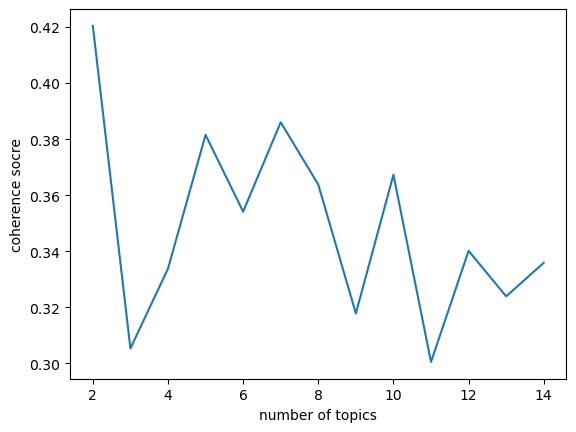

In [158]:
x = range(2, 15)
plt.plot(x, coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence socre')
plt.show()

In [159]:
import matplotlib.pyplot as plt
perplexity_values = []
for i in range(2, 20):
    idamodel = gensim.models.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(idamodel.log_perplexity(corpus))

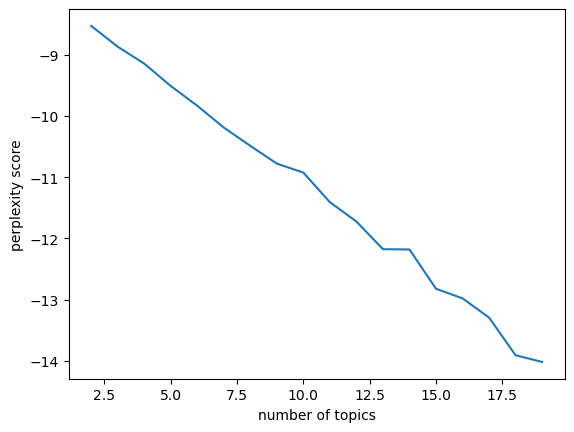

In [160]:
x = range(2, 20)
plt.plot(x, perplexity_values)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

In [161]:
# 갯수 수정
ldamodel = gensim.models.LdaModel(corpus, num_topics=6, alpha=0.1, id2word=dictionary)

In [162]:
ldamodel.print_topics(num_words=100)

[(0,
  '0.002*"제주" + 0.002*"이메일" + 0.001*"청소년" + 0.001*"경제" + 0.001*"복사" + 0.001*"전재" + 0.001*"거부" + 0.001*"무단" + 0.001*"문화" + 0.001*"정책" + 0.001*"개인" + 0.001*"등록" + 0.001*"제주도" + 0.001*"뉴스" + 0.001*"정치" + 0.001*"트위터" + 0.001*"수집" + 0.001*"공유" + 0.001*"페이스" + 0.001*"보기" + 0.001*"교육" + 0.001*"관광" + 0.001*"회원" + 0.001*"운영" + 0.001*"글씨" + 0.001*"전화" + 0.001*"특별" + 0.001*"보호" + 0.001*"기고" + 0.001*"검색" + 0.001*"신청" + 0.001*"영상" + 0.001*"방침" + 0.001*"여행" + 0.001*"정보" + 0.001*"저작권자" + 0.001*"재배" + 0.001*"책임자" + 0.001*"기본" + 0.001*"코로나" + 0.001*"오피니언" + 0.001*"위로" + 0.001*"사회" + 0.001*"로그" + 0.001*"가입" + 0.001*"번호" + 0.001*"전체" + 0.001*"확인" + 0.001*"금지" + 0.001*"광고" + 0.001*"사항" + 0.001*"하기" + 0.001*"자동" + 0.001*"건강" + 0.001*"보내기" + 0.001*"포토" + 0.001*"스토리" + 0.001*"카카오" + 0.001*"대표" + 0.001*"스크랩" + 0.001*"다음" + 0.001*"주요" + 0.001*"계획" + 0.001*"자치" + 0.001*"업체" + 0.001*"지원" + 0.001*"사업" + 0.001*"연예" + 0.001*"산업" + 0.001*"대회" + 0.001*"처리" + 0.001*"최종" + 0.001*"편집인" + 0.001*"메뉴" + 0.001*"올해" + 0

In [163]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
vis

/Users/jin-yulim/miniforge3/envs/gensim/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.000026 -0.006138       1        1  35.415700
0     -0.002760  0.005717       2        1  34.634236
4      0.006047  0.000464       3        1  25.300962
5      0.003215  0.002469       4        1   4.477067
1     -0.000861 -0.001943       5        1   0.157038
2     -0.005616 -0.000570       6        1   0.014997, topic_info=     Term       Freq      Total Category  logprob  loglift
375    제주  13.000000  13.000000  Default  30.0000  30.0000
438   트위터   6.000000   6.000000  Default  29.0000  29.0000
6      가입   7.000000   7.000000  Default  28.0000  28.0000
67     기사   7.000000   7.000000  Default  27.0000  27.0000
159    방침   7.000000   7.000000  Default  26.0000  26.0000
..    ...        ...        ...      ...      ...      ...
43     교육   0.000960   7.512122   Topic6  -6.9489  -0.1599
175    보호   0.000950   7.586100   Topic6  -6.9600  -0.1808
58     글씨   0.000938   7.639194   Topic6  -6.9720  -0.1998
473    하기   0.000913   7.123680   Topic6  -6.9989  -0.1568
282  오피니언   0.000903   7.130569   Topic6  -7.0103  -0.1692

[496 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.360728   가기
0         2  0.360728   가기
0         3  0.360728   가기
969       1  0.284081   가을
969       2  0.568163   가을
...     ...       ...  ...
491       2  0.396490   회원
491       3  0.264327   회원
1589      1  0.269803   희망
1589      2  0.269803   희망
1589      3  0.269803   희망

[773 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 6, 2, 3])

In [164]:
kk = ldamodel.show_topic(4, topn=80000)
type(ldamodel.show_topic)
kk2 = pd.DataFrame(kk)
kk2.head(30)

,0,1
0,제주,0.001913
1,무단,0.001446
2,사회,0.001380
3,글씨,0.001377
4,금지,0.001339
5,번호,0.001306
6,전화,0.001300
7,기자,0.001287
8,복사,0.001277
9,포토,0.001263
